<a href="https://colab.research.google.com/github/GabrielJunqueira/Python/blob/main/Curso_Formatos_Diferentes_de_Entradas_e_Sa%C3%ADdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando Nomes

In [1]:
import pandas as pd

In [2]:
pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [3]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [4]:
#juntando as duas listas em uma variável
frames = [nomes_f, nomes_m]

In [5]:
#concatenando as duas listas e transformando tudo em um único dataframe
nomes = pd.concat(frames)['nome'].to_frame()

In [6]:
nomes.sample(6)

,nome
19,MARIANA
11,CAMILA
2,ANTONIO
15,BRUNO
9,MARCOS
7,FERNANDA


# Incluindo ID dos alunos

In [7]:
import numpy as np

In [8]:
#gerando IDs aleatórios para cada aluno:
total_alunos = len(nomes)
total_alunos

40

In [9]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [10]:
nomes.sample(6)

,nome,id_aluno
13,DANIEL,3
7,FERNANDA,38
8,LUIZ,30
11,GABRIEL,33
10,LUIS,5
16,JULIA,2


In [11]:
#criando domínios de email:

In [12]:
#criando uma lista com 2 dominios de emails possíveis:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']

In [13]:
#criamos então uma nova coluna no dataframe nomes, para adicionar o email de cada um dos alunos nela
#para isso, usamos a função choice do 'np' que seleciona aleatoriamente um dos domínios da lista acima
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [14]:
nomes.sample(4)

,nome,id_aluno,dominio
10,LUIS,5,@dominioemail.com.br
17,FELIPE,32,@servicodoemail.com
0,MARIA,10,@dominioemail.com.br
4,CARLOS,9,@dominioemail.com.br


In [15]:
#agora, concatenamos o nome do aluno (em letra minuscula) com o seu respectivo domínio de email
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()

In [16]:
nomes.sample(5)

,nome,id_aluno,dominio,email
19,RODRIGO,27,@servicodoemail.com,rodrigo@servicodoemail.com
10,SANDRA,37,@dominioemail.com.br,sandra@dominioemail.com.br
3,ANTONIA,22,@servicodoemail.com,antonia@servicodoemail.com
18,RAIMUNDO,1,@dominioemail.com.br,raimundo@dominioemail.com.br
15,LETICIA,12,@servicodoemail.com,leticia@servicodoemail.com


# Criando a Tabela Cursos

In [17]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import html5lib

In [19]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [20]:
type(cursos)

list

In [21]:
#forma fácil de converter uma lista para um dataframe do pandas:
cursos = cursos[0]

In [22]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando o index de cursos

In [23]:
#vamos realizar as seguintes ações: mudar o título da coluna "Nome do Curso", criar uma coluna com um id para cada curso, resetar o index da tabela
#fazendo com que o index passe a ser o próprio id do curso

In [24]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [25]:
cursos.head(3)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web


In [26]:
#criando uma coluna id do curso
cursos['id_do_curso'] = cursos.index + 1

In [27]:
cursos.head(3)

,nome_do_curso,id_do_curso
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3


In [28]:
#resetando o index da tabela:
cursos = cursos.set_index('id_do_curso')

In [29]:
cursos.head(3)

,nome_do_curso
id_do_curso,
1,Lógica de programação
2,Java para Web
3,C# para Web


# Matriculando os alunos nos cursos

In [30]:
#quero fazer uma nova coluna que mostre em quantos cursos cada aluno está matriculado
#o ideal é que haja poucos alunos matriculados em muitos cursos, portanto utilizaremos a função exponential do numpy

In [31]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
5,PAULO,36,@dominioemail.com.br,paulo@dominioemail.com.br,2
14,JESSICA,23,@dominioemail.com.br,jessica@dominioemail.com.br,3
8,LUIZ,30,@servicodoemail.com,luiz@servicodoemail.com,1
8,PATRICIA,17,@dominioemail.com.br,patricia@dominioemail.com.br,6
10,SANDRA,37,@dominioemail.com.br,sandra@dominioemail.com.br,2


In [32]:
nomes['matriculas'].describe().round(2)

count    40.00
mean      2.48
std       1.69
min       1.00
25%       1.00
50%       2.00
75%       3.00
max       8.00
Name: matriculas, dtype: float64

In [33]:
#para plotar gráficos com os resultados obtidos, importamos o seaborn
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


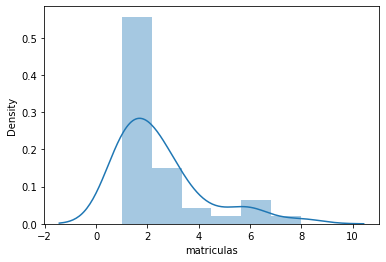

In [34]:
sns.distplot(nomes['matriculas'])

In [35]:
#para saber exatamente quantos alunos estão fazendo 1, 2 ou 3, etc cursos, usamos a função value_counts()
nomes['matriculas'].value_counts()

2    13
1    13
3     7
6     3
4     2
5     1
8     1
Name: matriculas, dtype: int64

# Selecionando Cursos

In [36]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [37]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,10,8
1,10,6
2,35,8
3,16,16
4,16,16


In [38]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [39]:
matriculas_por_curso 

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
4,10,Ruby on Rails
5,8,Cursos de Python
6,7,PHP com MySql
7,8,.NET para web
8,12,Novas integrações com Java
9,11,TDD com Java
10,1,Código limpo com C#


# Saída em diferentes formatos

In [40]:
matriculas_por_curso.head(5)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
4,10,Ruby on Rails
5,8,Cursos de Python
6,7,PHP com MySql


In [41]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [42]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,2,Lógica de programação
1,5,Java para Web
2,10,Ruby on Rails
3,8,Cursos de Python
4,7,PHP com MySql
5,8,.NET para web
6,12,Novas integrações com Java
7,11,TDD com Java
8,1,Código limpo com C#
9,6,Preparatório para certificação Java


In [43]:
 matriculas_por_curso.to_json('matriculas_por_curso.json')

In [44]:
pd.read_json('matriculas_por_curso.json')

,quantidade_de_alunos,nome_do_curso
1,2,Lógica de programação
2,5,Java para Web
4,10,Ruby on Rails
5,8,Cursos de Python
6,7,PHP com MySql
7,8,.NET para web
8,12,Novas integrações com Java
9,11,TDD com Java
10,1,Código limpo com C#
11,6,Preparatório para certificação Java


In [45]:
matriculas_html = matriculas_por_curso.to_html()

In [46]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>10</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>8</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>7</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>8</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>12</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>11</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1</td>
    

# Criando o banco SQL

In [47]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [49]:
engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspectoCOPIAR CÓDIGO

['matriculas']


# Buscando do Banco SQL

In [50]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [51]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,2,Lógica de programação
1,2,5,Java para Web
2,4,10,Ruby on Rails
3,5,8,Cursos de Python
4,6,7,PHP com MySql
5,7,8,.NET para web
6,8,12,Novas integrações com Java
7,9,11,TDD com Java
8,10,1,Código limpo com C#
9,11,6,Preparatório para certificação Java


In [52]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,2
1,Java para Web,5
2,Ruby on Rails,10
3,Cursos de Python,8
4,PHP com MySql,7
5,.NET para web,8
6,Novas integrações com Java,12
7,TDD com Java,11
8,Código limpo com C#,1
9,Preparatório para certificação Java,6


In [53]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [54]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos


In [55]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos


In [56]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [57]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [58]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
4,10,Ruby on Rails
5,8,Cursos de Python
6,7,PHP com MySql
7,8,.NET para web
8,12,Novas integrações com Java
9,11,TDD com Java
10,1,Código limpo com C#


In [63]:
#vou escolher o curso Código Limpo em C# (código = 10)
id_curso = 16

In [64]:
matriculas

,id_aluno,id_curso
0,10,8
1,10,6
2,35,8
3,16,16
4,16,16
...,...,...
94,32,16
95,1,4
96,1,16
97,27,11


In [65]:
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
3,16,16
4,16,16
12,38,16
23,21,16
80,28,16
94,32,16
96,1,16


In [66]:
nomes.sample(4)

,nome,id_aluno,dominio,email,matriculas
14,JESSICA,23,@dominioemail.com.br,jessica@dominioemail.com.br,3
8,PATRICIA,17,@dominioemail.com.br,patricia@dominioemail.com.br,6
16,JULIA,2,@dominioemail.com.br,julia@dominioemail.com.br,2
7,LUCAS,40,@dominioemail.com.br,lucas@dominioemail.com.br,3


In [67]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
1,16,RAIMUNDO,@dominioemail.com.br,raimundo@dominioemail.com.br,2
16,16,FRANCISCA,@dominioemail.com.br,francisca@dominioemail.com.br,2
16,16,FRANCISCA,@dominioemail.com.br,francisca@dominioemail.com.br,2
21,16,AMANDA,@dominioemail.com.br,amanda@dominioemail.com.br,1
28,16,MARCELO,@servicodoemail.com,marcelo@servicodoemail.com,8
32,16,FELIPE,@servicodoemail.com,felipe@servicodoemail.com,3
38,16,FERNANDA,@servicodoemail.com,fernanda@servicodoemail.com,3


In [68]:
portaria = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

In [69]:
portaria 

id_aluno
1      RAIMUNDO
16    FRANCISCA
16    FRANCISCA
21       AMANDA
28      MARCELO
32       FELIPE
38     FERNANDA
Name: nome, dtype: object

In [70]:
df_portaria = pd.DataFrame(portaria)

In [71]:
df_portaria

,nome
id_aluno,
1,RAIMUNDO
16,FRANCISCA
16,FRANCISCA
21,AMANDA
28,MARCELO
32,FELIPE
38,FERNANDA


In [73]:
#localizando o nome do curso cujo código é 16
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [74]:
#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
df_portaria.rename(columns = {'nome':'Alunos de Estatística básica'}, inplace = True)

In [75]:
df_portaria

,Alunos de Estatística básica
id_aluno,
1,RAIMUNDO
16,FRANCISCA
16,FRANCISCA
21,AMANDA
28,MARCELO
32,FELIPE
38,FERNANDA


# Excel

In [76]:
df_portaria

,Alunos de Estatística básica
id_aluno,
1,RAIMUNDO
16,FRANCISCA
16,FRANCISCA
21,AMANDA
28,MARCELO
32,FELIPE
38,FERNANDA


In [80]:
df_portaria.to_excel("portaria.xlsx", index = False)

In [81]:
pd.read_excel("portaria.xlsx")

,Alunos de Estatística básica
0,RAIMUNDO
1,FRANCISCA
2,FRANCISCA
3,AMANDA
4,MARCELO
5,FELIPE
6,FERNANDA
